# ANN

In [102]:
# installing tensorflow liberary
!pip install tensorflow

In [103]:
# installing necessary liberaries
# for data manupulation
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# setting parameters for graphs
plt.rcParams['figure.figsize']  = (10, 5)
plt.rcParams['figure.dpi']  = 250

# for model and data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# for ignoring future warnings
import warnings
warnings.filterwarnings('ignore')

In [104]:
# reading dataset
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/ARTIFICIAL%20NURAL%20NETWORK(ANN)/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [105]:
df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [106]:
# I can see that RowNumber, CustomerId, Surname columns are not important for our the prediction
# so on the basis of domain knowledge I can remove this columns
# even if I perform one hot encoding on surname column then 2932 new columns will be created,
#  which is a very bad thing because this will lead to curse of dimensionality

In [107]:
# Dropping RowNumber, CustomerId, Surname columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [108]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


I need to predict whether the customer will exit the bank or not in future. So I have dataset for the  customers who exited the bank in the past.
I have to create a model which will predict whether the existing customer will exit the bank in near future or not.
Exited is the target column in the dataset.

In [109]:
# checking null values
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [110]:
# no missing values

In [111]:
# checking duplicated values
df.duplicated().sum()

0

<Axes: xlabel='Gender', ylabel='count'>

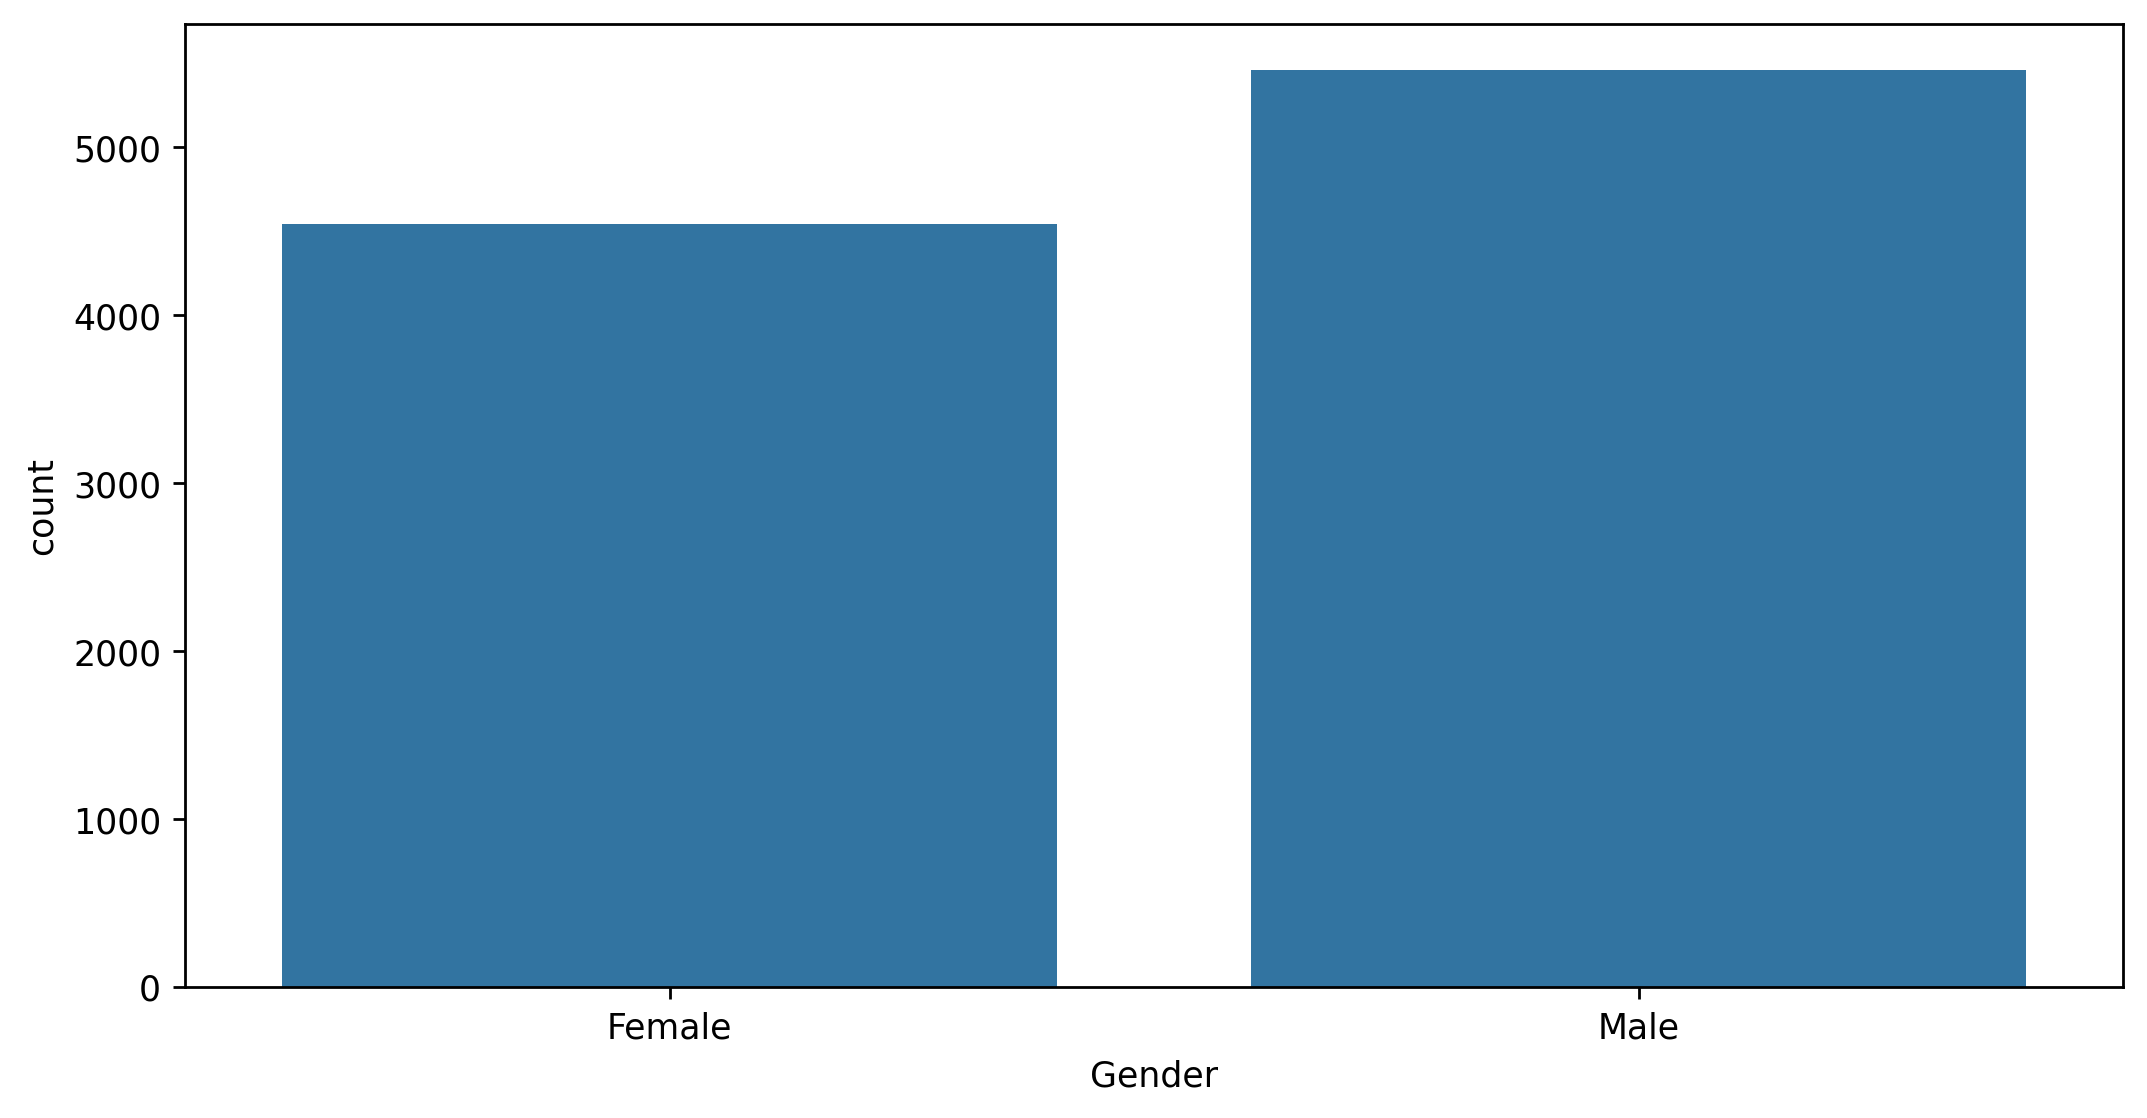

In [112]:
# visualization for the distribution of gender
sns.countplot(data=df, x='Gender')

In [113]:
# number of unique values in the Geography column
df.Geography.nunique()

3

<Axes: xlabel='Geography', ylabel='count'>

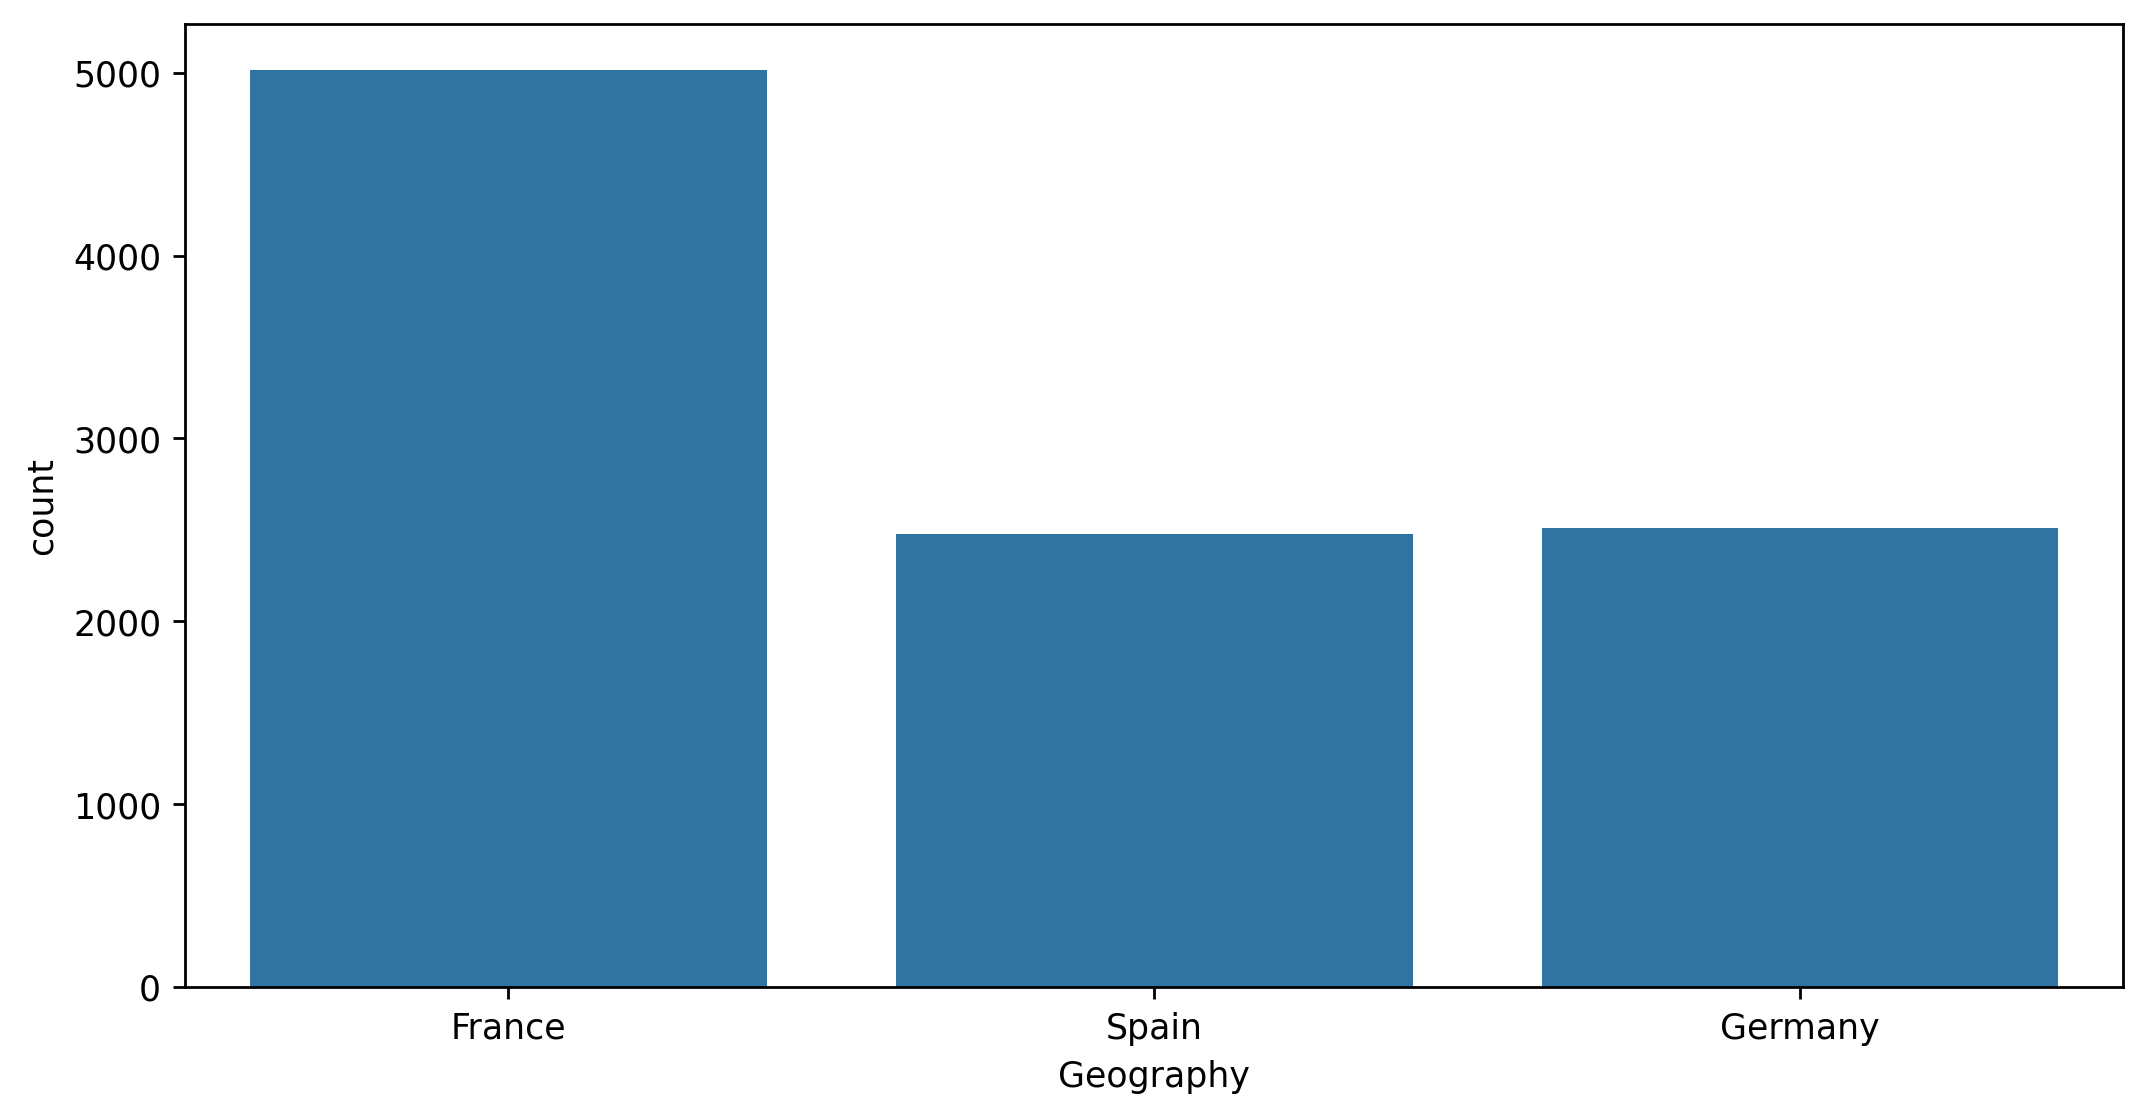

In [114]:
# # visualization for the distribution of Geography
sns.countplot(data=df, x='Geography')

In [115]:
# the customers from France is the highest for the bank
# the male customer are more than the female customers

<Axes: xlabel='Age', ylabel='Count'>

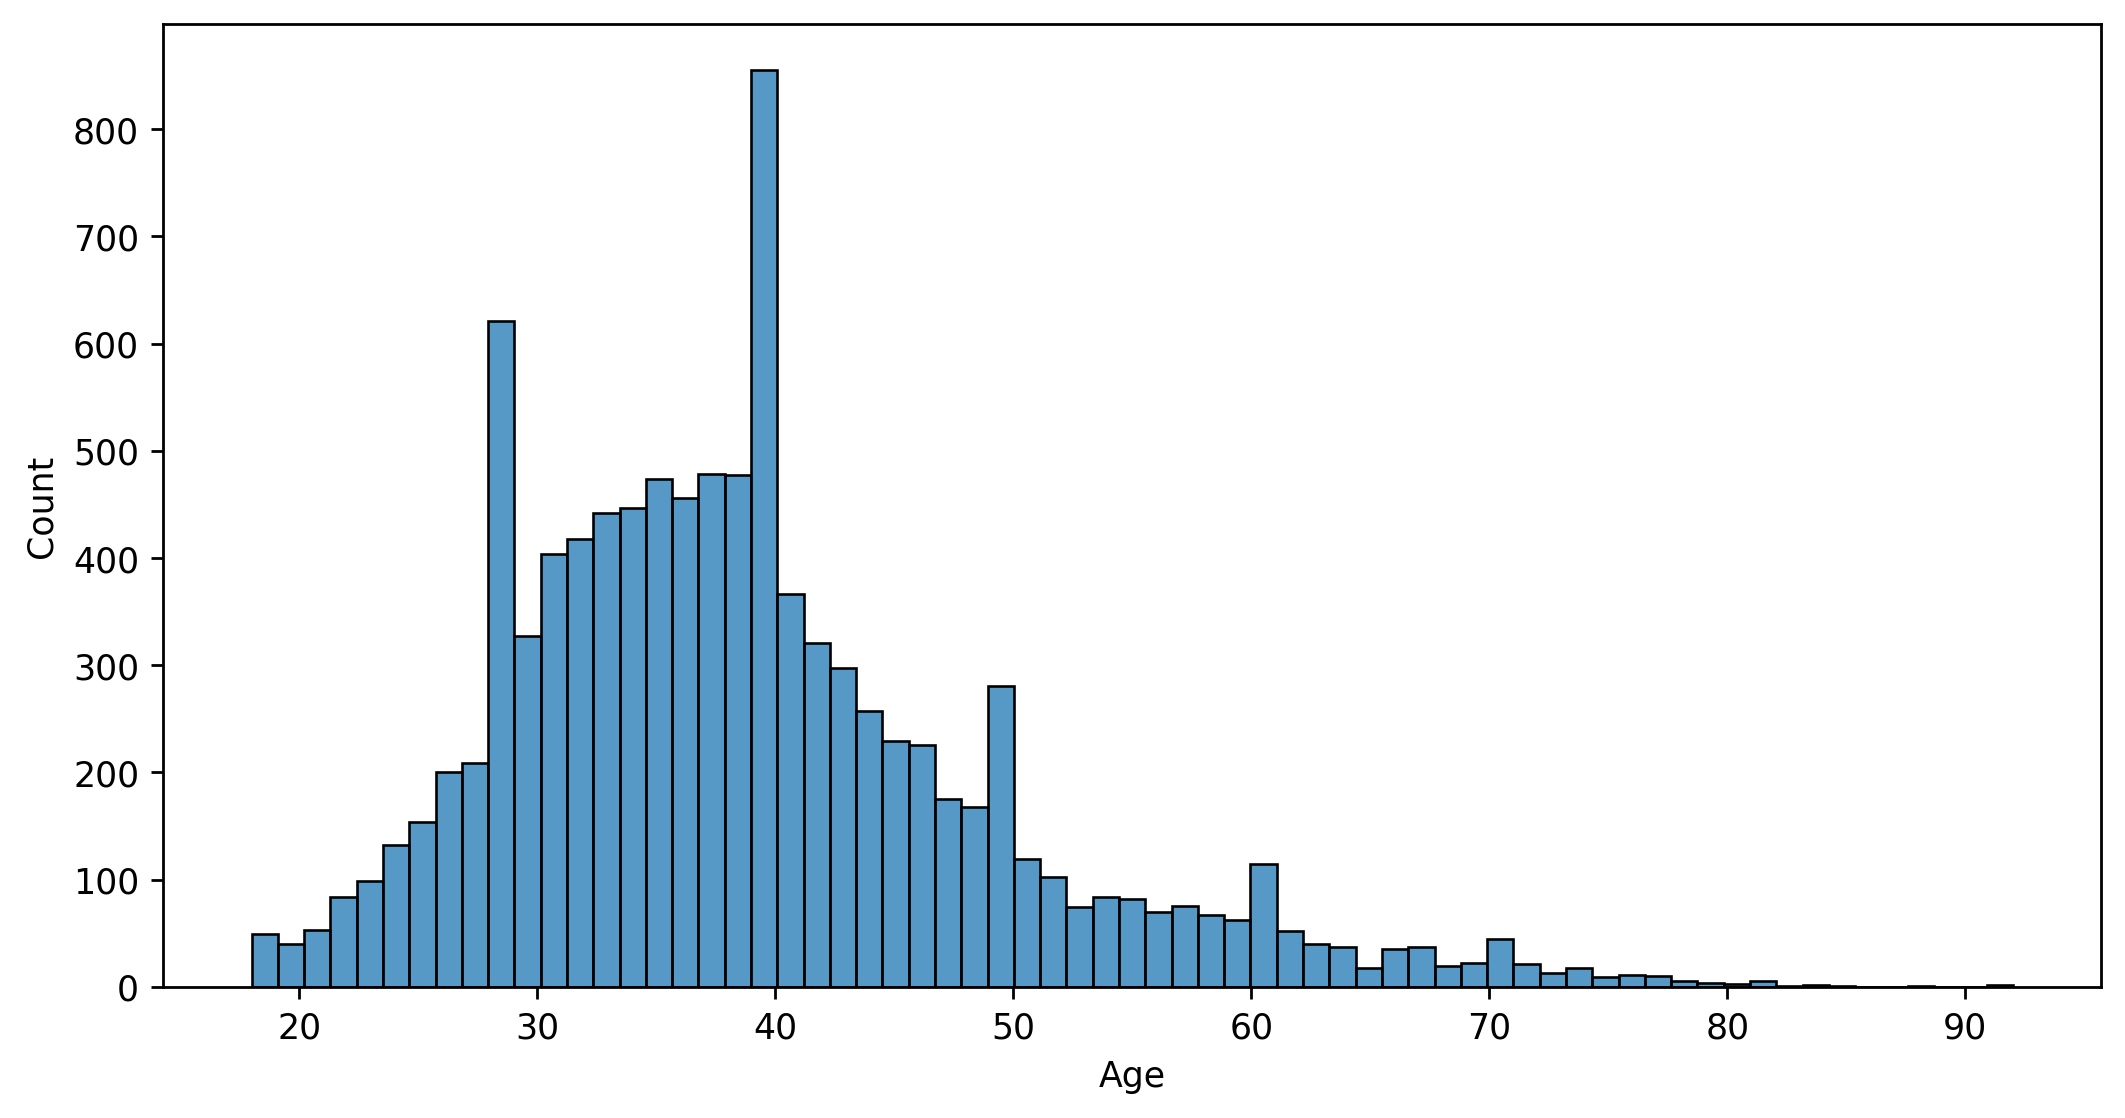

In [116]:
# distribution of age
sns.histplot(data=df, x='Age')

In [117]:
# most of the customers are in the range of 25 to 50 years of age group

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

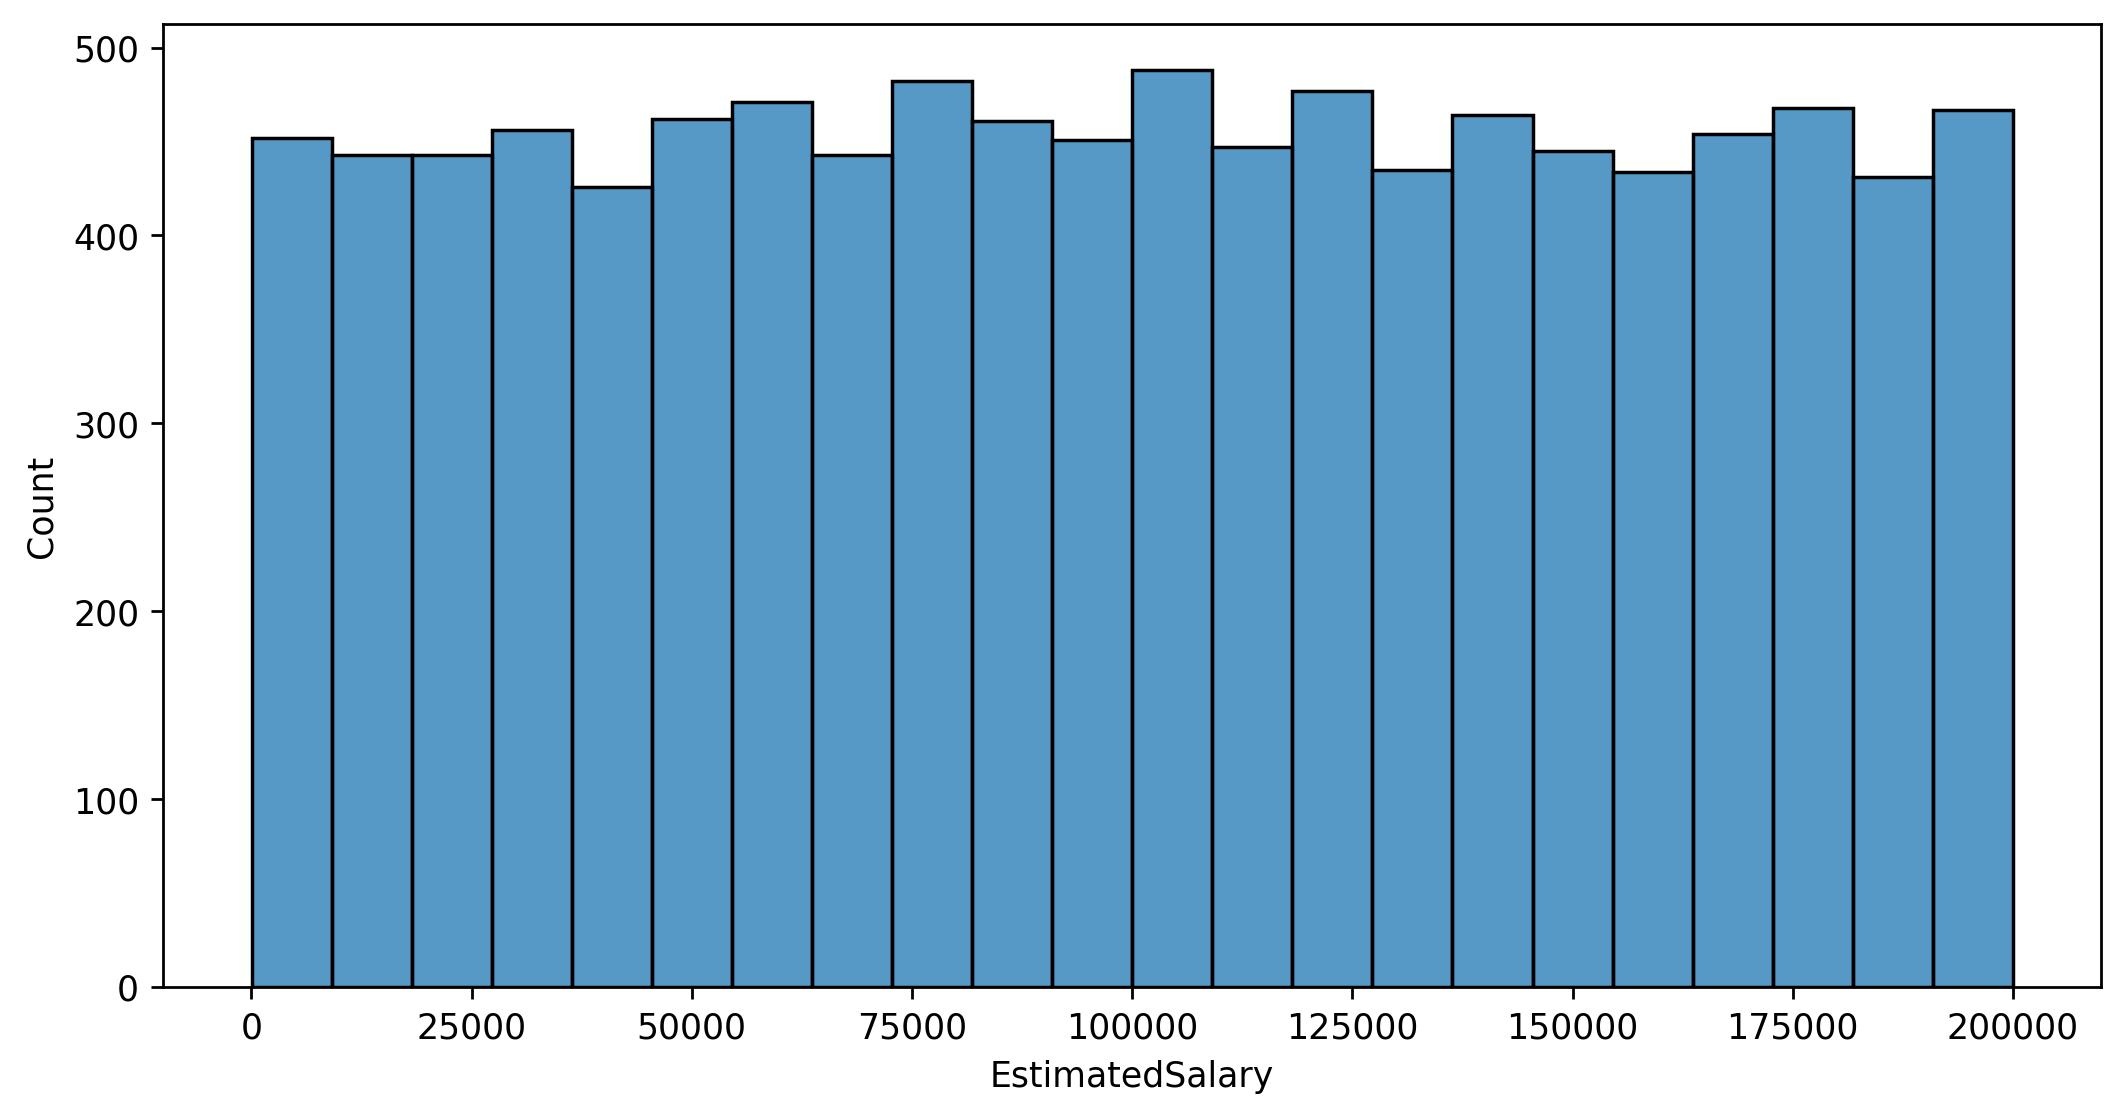

In [118]:
# distribution of EstimatedSalary
sns.histplot(data=df, x='EstimatedSalary')

In [119]:
# the count of customer for all salary group is almost similar

<Axes: xlabel='Exited', ylabel='Count'>

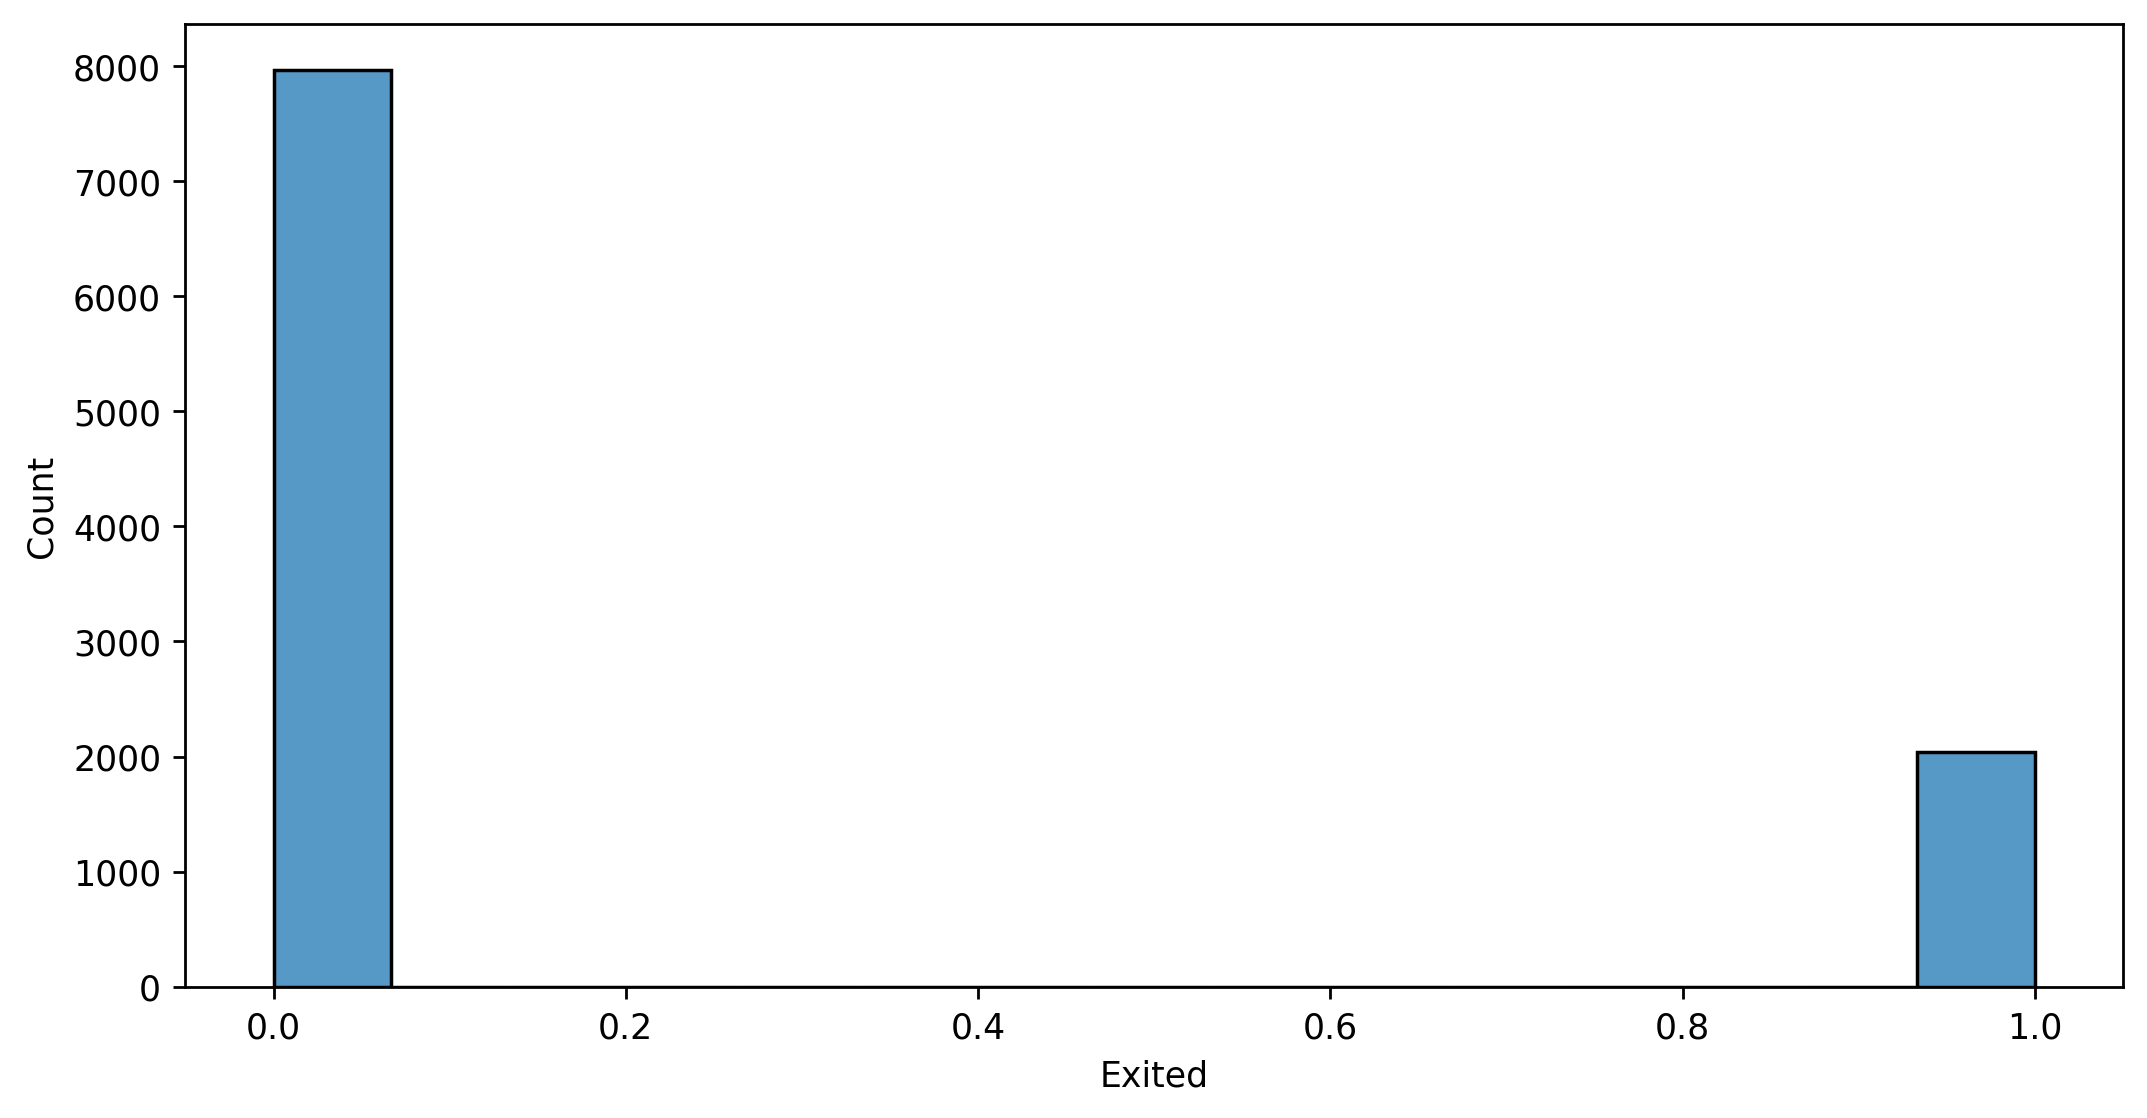

In [120]:
# distribution of the target column
sns.histplot(data=df, x='Exited')

In [121]:
#count of classes
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [122]:
# data is imbalanced so I will use some technique to deal with this problem

<Axes: xlabel='IsActiveMember', ylabel='Count'>

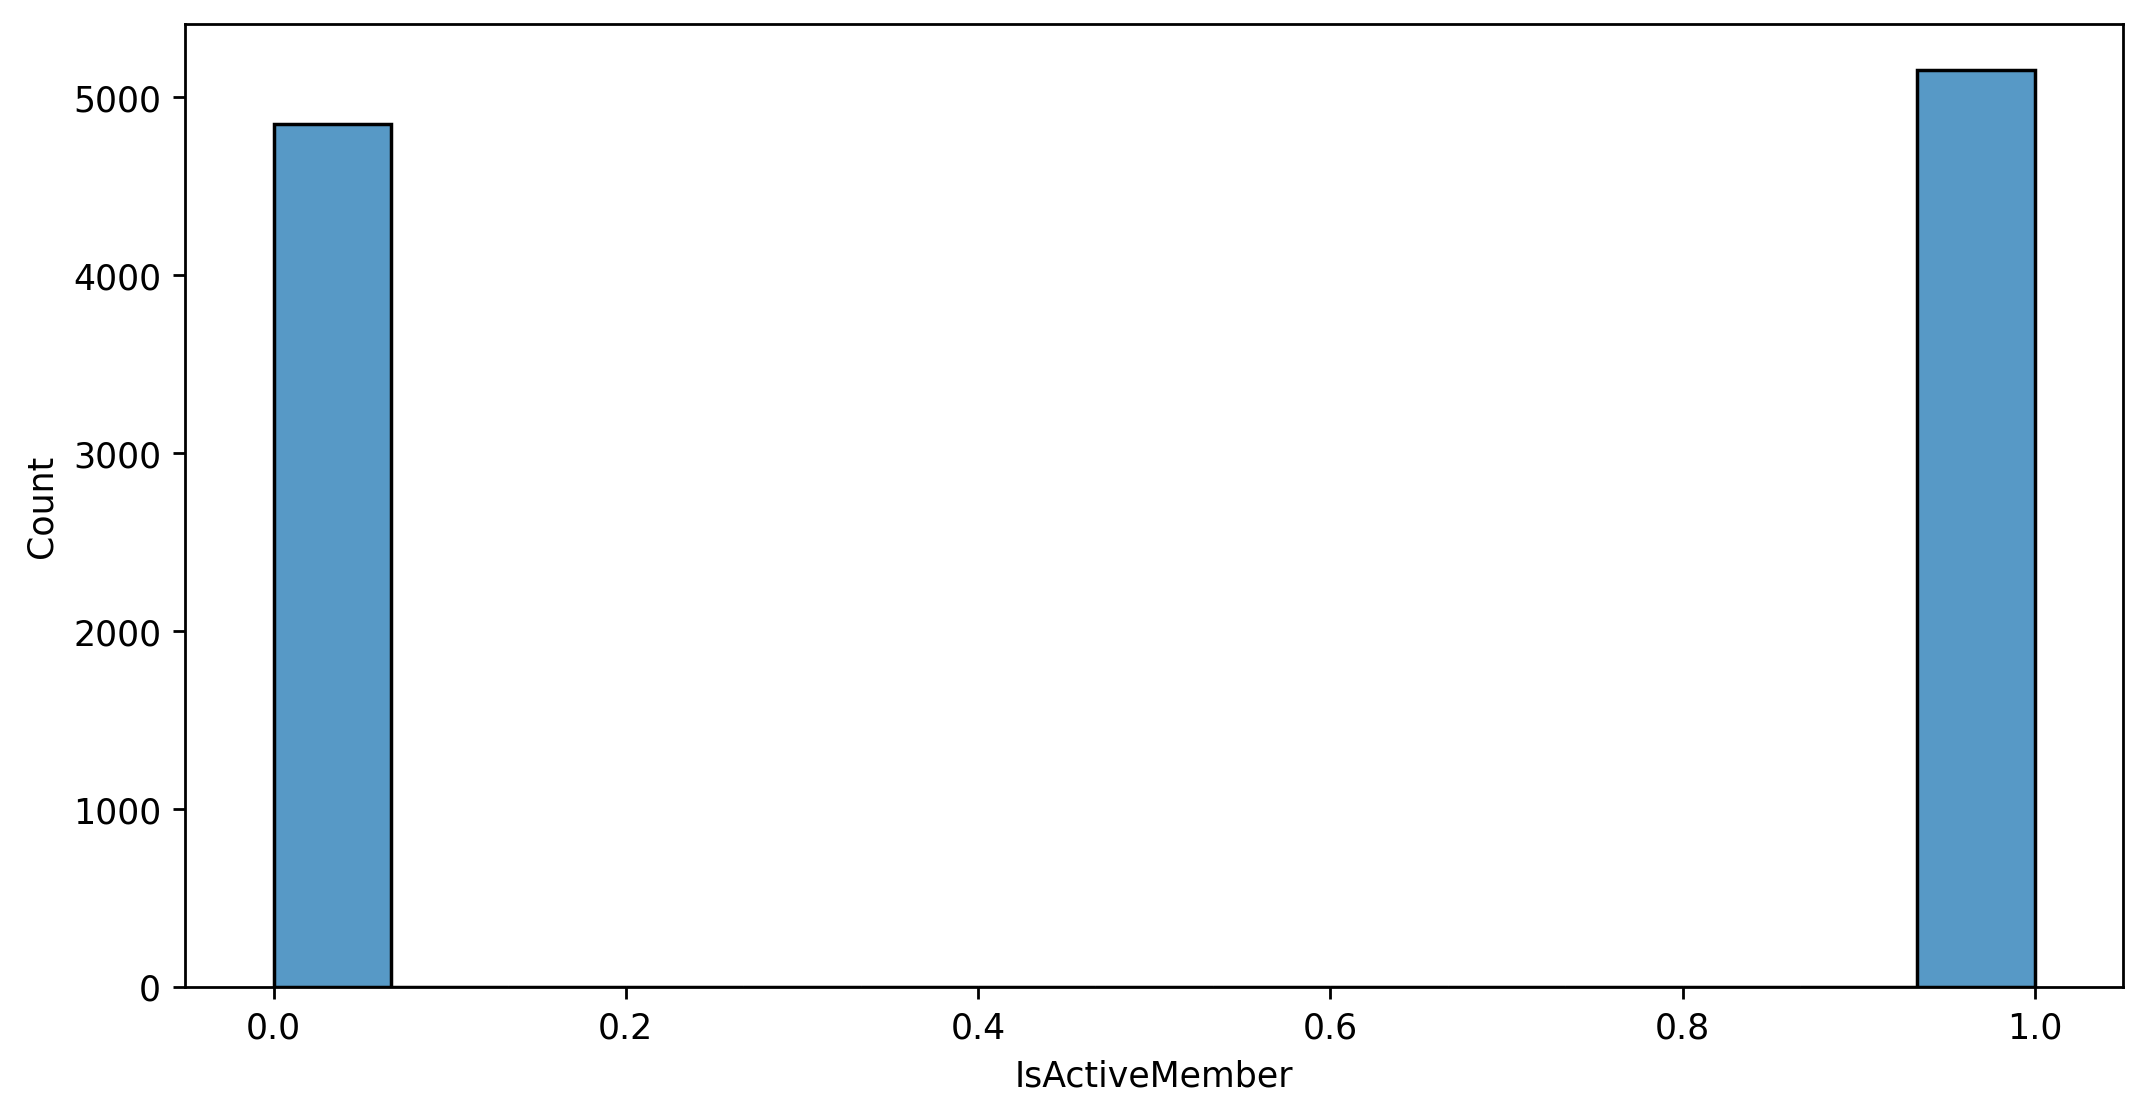

In [123]:
# distribution of the IsActiveMember column
sns.histplot(data=df, x='IsActiveMember')

In [124]:
# the number of active and inactive users are almost similar

<Axes: xlabel='HasCrCard', ylabel='Count'>

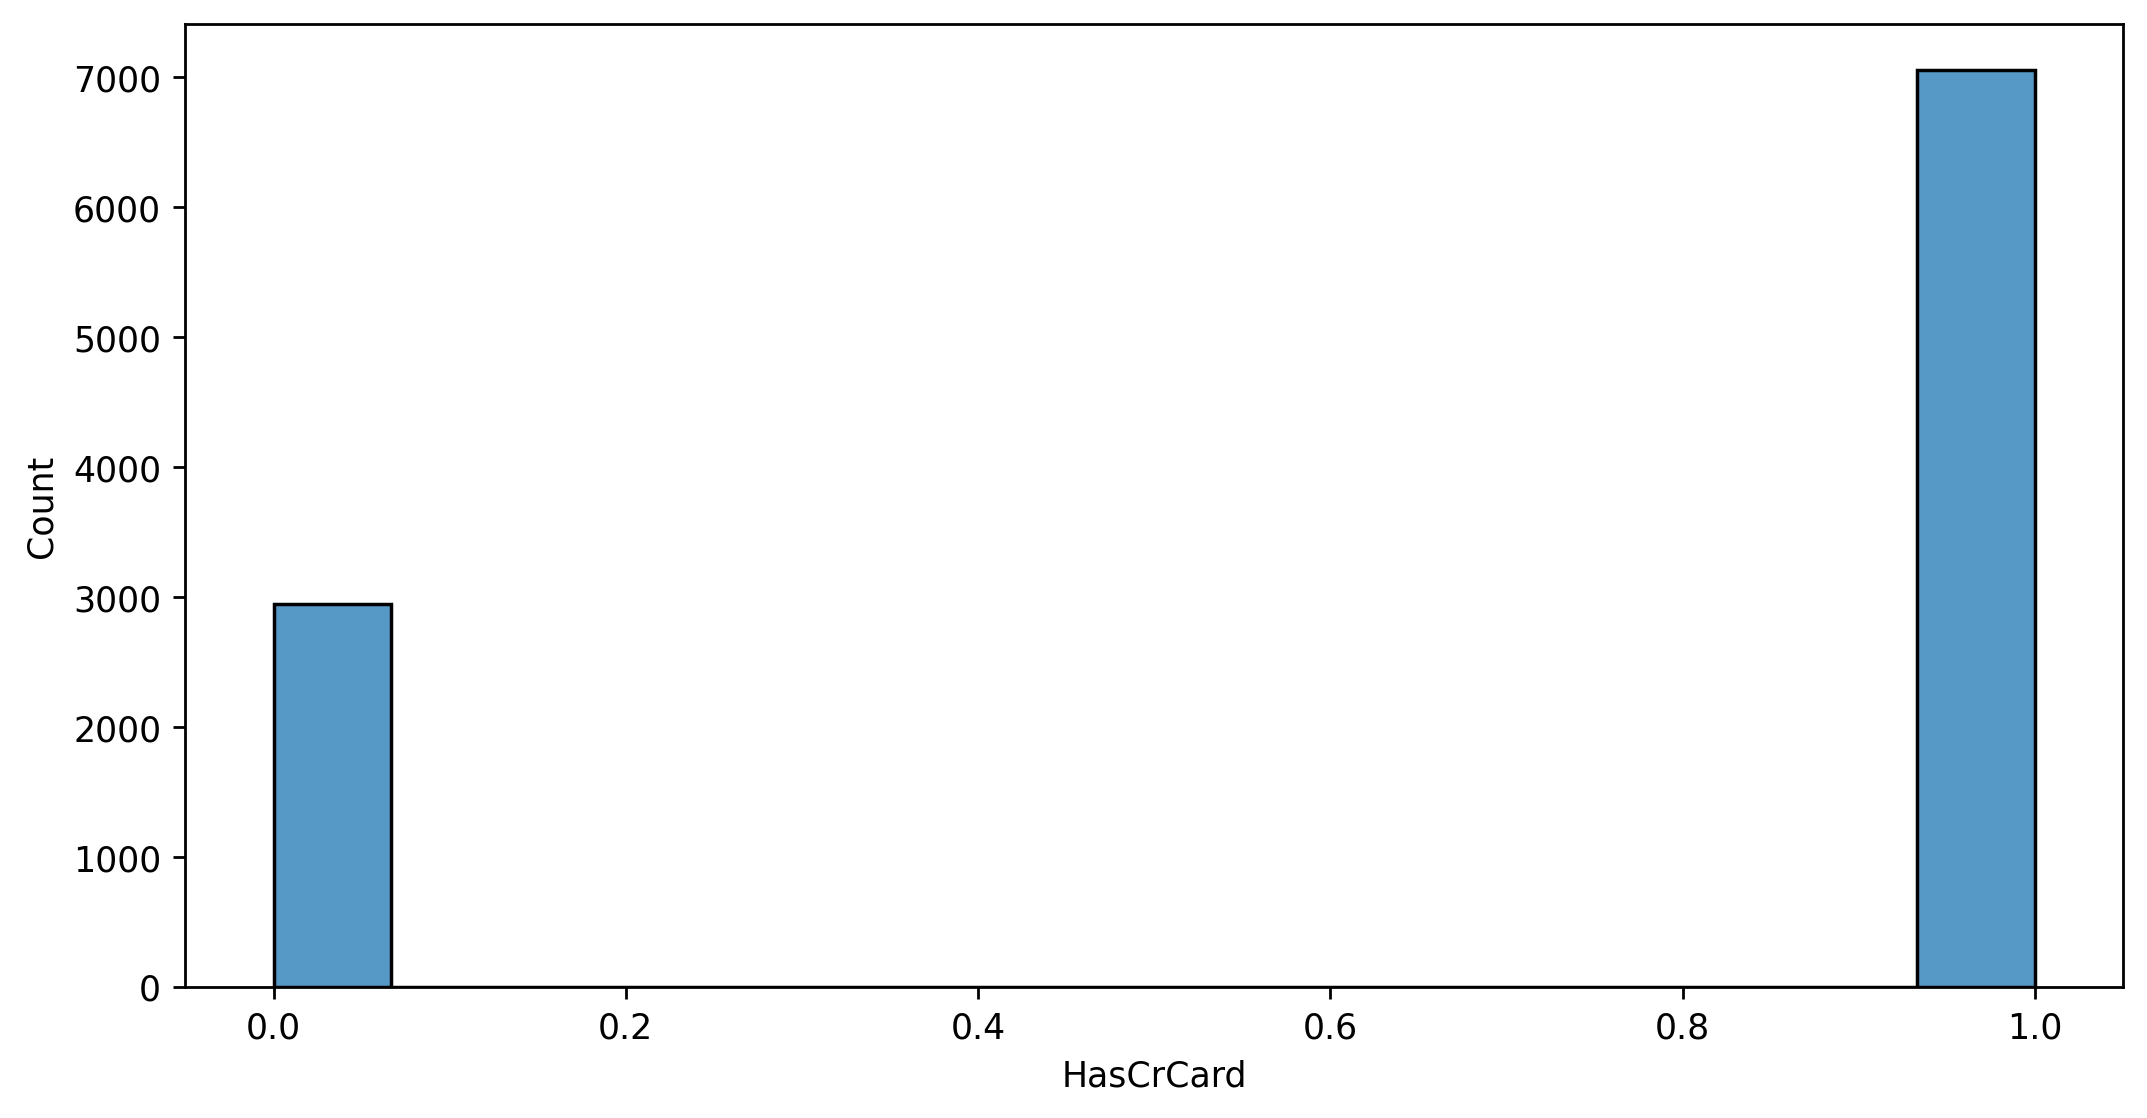

In [125]:
# the customers who are having cerdit creditcard or not
sns.histplot(data=df, x='HasCrCard')

In [126]:
# the customer who are having credit card are way more than the person who are not having credit card of this bank.

<Axes: xlabel='NumOfProducts', ylabel='Count'>

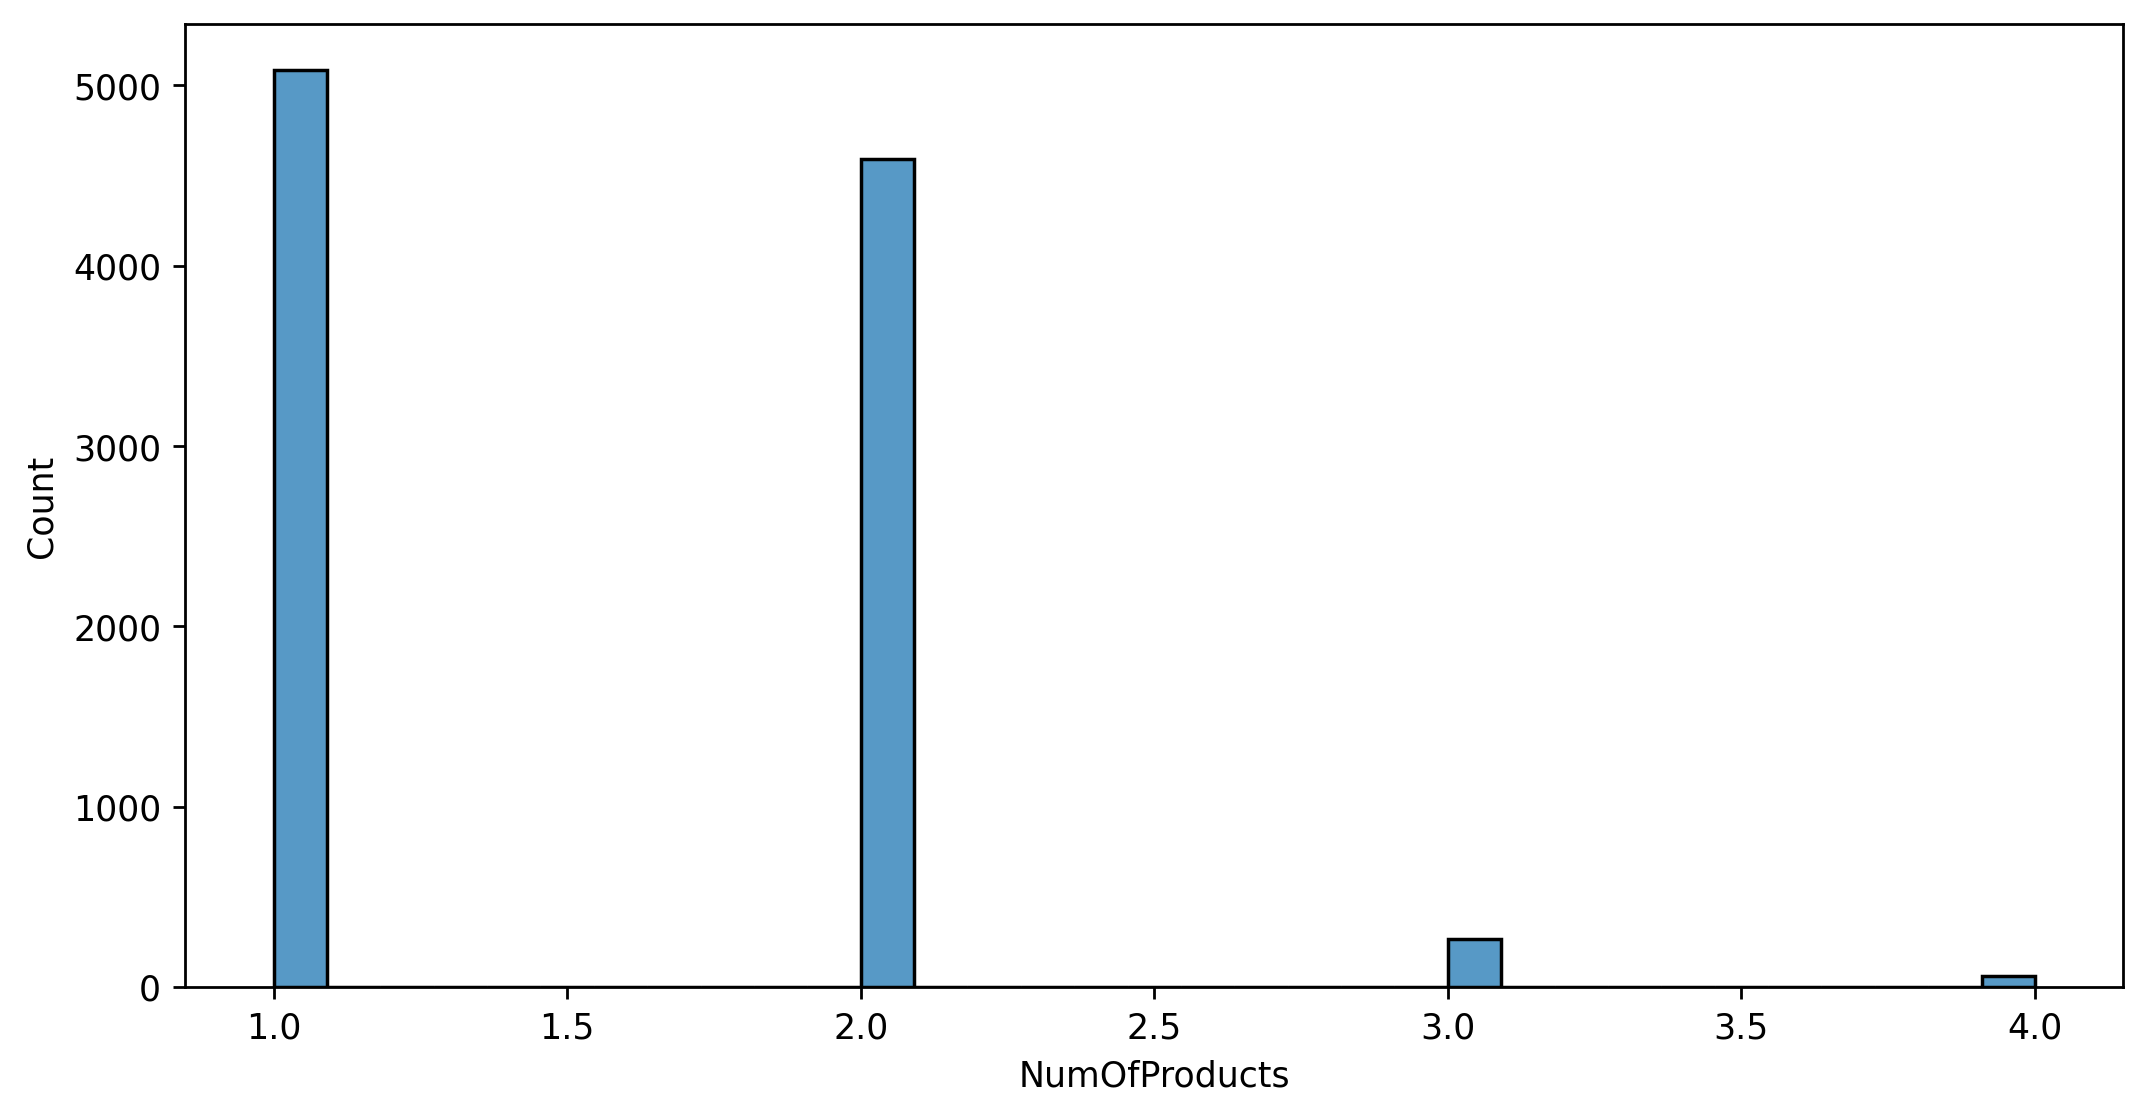

In [127]:
# the number of products bought by the bank customers
sns.histplot(data=df, x='NumOfProducts')

In [128]:
# most of the customers have bought either one or two products offered by this bank.

<Axes: xlabel='Age', ylabel='Balance'>

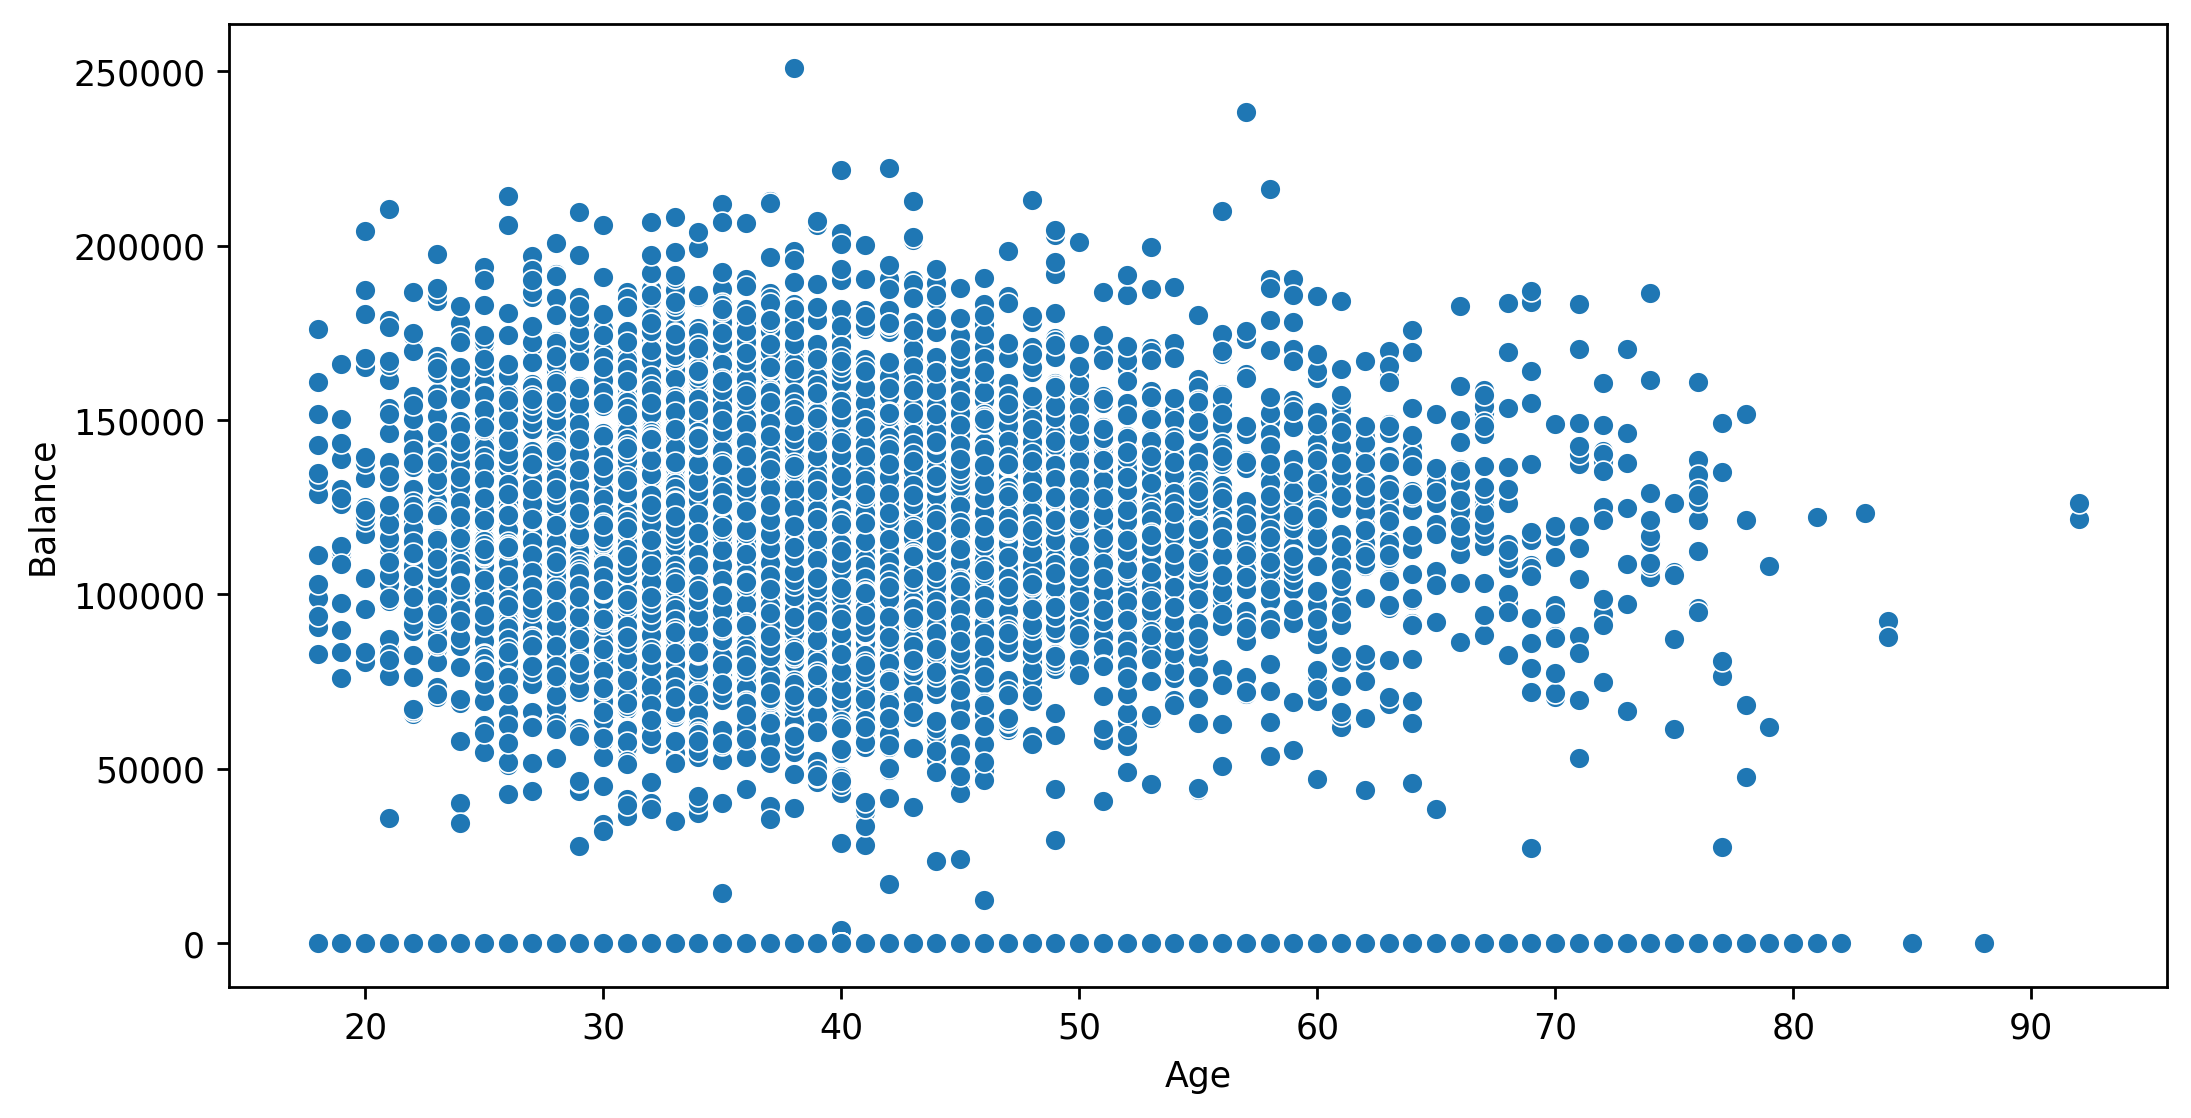

In [129]:
# relationship between the age and account balance in the bank
sns.scatterplot(data=df, x='Age', y='Balance')

In [130]:
# the age group of 20 to 65 is having the highest balance in the account

# DATA IS ALREADY CLEAN SO I WILL PROCEED WITH DATA TRANSORMATION AND MODEL BUILDING

# DATA TRANSFORMATION

In [131]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [132]:
# defining x and y variables
x = df.drop(columns='Exited')
y = df['Exited']
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [133]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [134]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [135]:
# deciding which technique should be used for encoding categorical columns
df.nunique()

,0
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


In [136]:
# in total there are 5 unique values in the Geography, Gender column so 5 new columns will be created after performing one hot encoding

# ENCODING CATEGORICAL COLUMNS

In [137]:
# ONE HOT ENCODING
x = pd.get_dummies(data=df, columns=['Geography', 'Gender'], dtype='int')

In [138]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


# STANDARDIZATION  (FEATURE SCALLING)

In [139]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scale = pd.DataFrame(x_scaled, columns=x.columns)
x_scale

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165,0.997204,-0.578736,-0.573809,1.095988,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775,-1.002804,-0.578736,1.742740,1.095988,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775,0.997204,-0.578736,-0.573809,1.095988,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775,-1.002804,-0.578736,1.742740,1.095988,-1.095988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775,0.997204,-0.578736,-0.573809,-0.912419,0.912419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775,0.997204,-0.578736,-0.573809,-0.912419,0.912419
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165,0.997204,-0.578736,-0.573809,1.095988,-1.095988
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165,-1.002804,1.727904,-0.573809,-0.912419,0.912419


In [140]:
# splitting data into trainig and testing part
xtrain, xtest, ytrain, ytest = train_test_split(x_scale, y, train_size=0.80, random_state=42)

In [141]:
xtrain.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9254,0.367013,-0.660018,0.341352,-1.225848,0.807737,0.646092,0.970243,1.373784,-0.505775,0.997204,-0.578736,-0.573809,-0.912419,0.912419
1561,-0.191713,0.293517,-0.350204,0.691389,0.807737,0.646092,0.970243,1.667407,-0.505775,-1.002804,1.727904,-0.573809,-0.912419,0.912419
1670,-0.947028,-1.422847,-0.695982,0.613102,-0.911583,0.646092,-1.030670,-0.246910,1.977165,-1.002804,-0.578736,1.742740,-0.912419,0.912419
6087,-0.926334,-1.136786,1.378686,0.948021,-0.911583,0.646092,-1.030670,0.921446,1.977165,0.997204,-0.578736,-0.573809,1.095988,-1.095988
6669,-1.381593,1.628468,1.378686,1.052363,-0.911583,-1.547768,-1.030670,-1.053812,1.977165,0.997204,-0.578736,-0.573809,-0.912419,0.912419


In [142]:
ytrain.head()

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1


# MODEL BUILDING

In [143]:
# I am using here adadelta optimizer just to see the difference between adadelta and adam optimizer

In [144]:
# intializing the model
ann = Sequential()

# adding a hidden layer
ann.add(Dense(units=10, activation='relu', input_dim=xtrain.shape[1]))

# adding output layer
ann.add(Dense(units=1, activation='sigmoid'))

# establish connection between the layers
ann.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the model on training data
ann.fit(xtrain, ytrain, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2835 - loss: 0.9404
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2919 - loss: 0.9305
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2877 - loss: 0.9378
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2819 - loss: 0.9366
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2840 - loss: 0.9354
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2917 - loss: 0.9226
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3011 - loss: 0.9197
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2977 - loss: 0.9205
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2910 - loss: 0.9214
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2926 - loss: 0.9205
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3041 - loss: 0.9092
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [145]:
# I can see the improvement from accuracy: 0.4575 - loss: 1.0585 in first iteration to  accuracy: 0.5600 - loss: 0.8756 in the last iteration

In [146]:
# getting prediction
ypred = ann.predict(xtest)
ypred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.33312327],
       [0.4720607 ],
       [0.48627636],
       ...,
       [0.7531067 ],
       [0.6693332 ],
       [0.46474063]], dtype=float32)

In [147]:
# the output is the probabilities like which datapoint belong to which class
# I need to convert these probabilities into 0 and 1 class
# for that I will use threshold of 0.5
ypred = ypred > 0.5
ypred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [148]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.89      0.49      0.63      1607
           1       0.26      0.75      0.39       393

    accuracy                           0.54      2000
   macro avg       0.58      0.62      0.51      2000
weighted avg       0.77      0.54      0.58      2000



In [149]:
# accuracy on the training data
ann.evaluate(xtrain, ytrain)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5671 - loss: 0.6910


[0.6981917023658752, 0.5547500252723694]

In [150]:
# accuracy on the test data
ann.evaluate(xtest, ytest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5451 - loss: 0.7020


[0.7070907950401306, 0.5389999747276306]

In [151]:
# accuracy of the model can be improved so I need to preform hyperparameter tunning
# here, I will only tune optimizer
# rest of the things I will do on other next

# HYPERPARAMETER TUNNING

In [152]:
# for hyperparameter tunning I need to install keras tunner liberary
!pip install -q -U keras-tuner

In [153]:
# importing keras tuner liberary
import keras_tuner as kt

In [154]:
# defining function for hypreparameter tunning
def optimizer_selection(hp):
  # intializing model
  model = Sequential()
  # adding hidden layer
  model.add(Dense(units=10, activation='relu'))
  # adding output layer
  model.add(Dense(units=1, activation='sigmoid'))
  # list of optimizers
  optim = hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop'])
  # stabilishing connections between the layers
  model.compile(optimizer=optim, loss='binary_crossentropy',metrics =['accuracy'])
  # return the model
  return model

In [155]:
# using random search to finding out the best optimizer
tunner = kt.RandomSearch(optimizer_selection,
                         objective='val_accuracy',
                         max_trials=3)

In [156]:
# searching for the best parameters
tunner.search(xtrain, ytrain, epochs=3, validation_data = (xtest, ytest))

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.9965000152587891

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 14s


In [157]:
# hyperparameter tunning is done
# it's time to ask for the best one from this Random search method
tunner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [158]:
# it is saying that best optimizer is adam optimizer

In [159]:
# model building by using the best optimizer
model = tunner.get_best_models(num_models=1)[0]

In [160]:
# fitting this model on trainig data
model.fit(xtrain, ytrain, epochs=91, validation_data=(xtest, ytest))

Epoch 1/91
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0144 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 2/91
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 2.3366e-04
Epoch 3/91
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.8592e-04 - val_accuracy: 1.0000 - val_loss: 7.3322e-05
Epoch 4/91
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 6.3230e-05 - val_accuracy: 1.0000 - val_loss: 4.0344e-05
Epoch 5/91
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.5548e-05 - val_accuracy: 1.0000 - val_loss: 2.7345e-05
Epoch 6/91
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.6173e-05 - val_accuracy: 1.0000 - val_loss: 2.0521e-05
Epoch 7/91
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.9854e-05 - val_accuracy: 1.0000 - val_loss: 1.6345e-05
Epoch 8/91
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accura

In [161]:
# performance on training data
# accuracy: 1.0000 - loss: 0.0151 - val_accuracy: 1.0000 - val_loss: 0.0040

#  performance on testing data
#  accuracy: 1.0000 - loss: 2.5604e-09 - val_accuracy: 1.0000 - val_loss: 2.3712e-09

# EVALUATION OF THE MODEL

In [162]:
model.evaluate(xtrain, ytrain)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.6004e-07


[7.553687737527071e-07, 1.0]

In [163]:
# the performace of the model is bery good

# FUNCITON FOR PERFORMING HYPERPARAMETER TUNNING OF ALL THE  NECESSARY PERAMETERS

In [164]:
# definining fuction
def hyper(hp):
  model = Sequential()

  # loop for adding hidden layers
  for i in range(hp.Int('num_layers', 1, 10)):
    units = hp.Int(f'units_{i}', 8, 128, 8)
    activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
    if i == 0:
      # Always use input_dim=xtrain.shape[1] to ensure consistent input shape
      model.add(Dense(units=units, activation=activation, input_dim=xtrain.shape[1]))
    else:
      model.add(Dense(units=units, activation=activation))
  # output layer
  model.add(Dense(1, activation='sigmoid'))
  # compiling the model
  model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6264 - loss: 0.6624 - val_accuracy: 0.9255 - val_loss: 0.3216
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9404 - loss: 0.2734 - val_accuracy: 0.9955 - val_loss: 0.1071
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9973 - loss: 0.0786 - val_accuracy: 1.0000 - val_loss: 0.0178
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 9.2133e-04 - val_accuracy: 1.0000 - val_loss: 1.7312e-04
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.2793e-04 - val_accuracy: 1.0000 - val_loss: 6.5275e-05
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.4997e-05 - val_accuracy: 1.0000 - val_loss: 3.8585e-05
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3

In [165]:
# Random search for searching the best combination of parameters
tunner = kt.RandomSearch(hyper,
                         objective='val_accuracy',
                         max_trials=3)

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
# ... (Rest of your code remains the same) ...

# After searching and getting the best model:
model_tune = tunner.get_best_models(num_models=1)[0]

# Before fitting the tuned model:
# Rebuild the model with the best hyperparameters to ensure the correct architecture
best_hp = tunner.get_best_hyperparameters()[0]
model_tune = hyper(best_hp)  # Rebuild the model with the best hyperparameters

# Now fit the tuned model:
model_tune.fit(xtrain, ytrain, epochs=25, validation_data=(xtest, ytest))

# EVALUATION OF THE MODEL

In [169]:
# performace of model on training data
model_tune.evaluate(xtrain, ytrain)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.8467e-06


[3.873751666105818e-06, 1.0]

In [170]:
# performance on testing data
model_tune.evaluate(xtest, ytest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.1893e-06


[3.972366812377004e-06, 1.0]

In [ ]:
# the loss is almost zero and accuracy of the model is 100% on both training and testing data